# Flight Delay Prediction 

In [34]:
from sys import stdin
import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from numpy import exp,array,random,dot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("FlightDelays.csv")

print("The number of rows in the data set is {}.".format(len(data)))
print("The number of features is {}.".format(len(data.columns)))

data.head()

The number of rows in the data set is 450017.
The number of features is 12.


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
0,2017,1,1,7,6,19805,1766,11298,12889,1055,1154,0.0
1,2017,1,1,8,7,19805,1766,11298,12889,1055,1154,0.0
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0


Data Preprocessing:

In [35]:
# Finding Null Values
data.isnull().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
AIRLINE_ID              0
FL_NUM                  0
ORIGIN_AIRPORT_ID       0
DEST_AIRPORT_ID         0
SCHED_DEP_TIME          0
SCHED_ARR_TIME          0
DELAY                8541
dtype: int64

In [36]:
new_data = data.dropna(axis=0)#Delete the rows containing missing data
new_data.isnull().sum() #Check to make sure there are no more NaNs

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
AIRLINE_ID           0
FL_NUM               0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
SCHED_DEP_TIME       0
SCHED_ARR_TIME       0
DELAY                0
dtype: int64

In [37]:
print("The number of rows in the new data set is {}.".format(len(new_data)))

The number of rows in the new data set is 441476.


In [38]:
#subset the flight that delayed
delay_flight=new_data[new_data.DELAY==1]
#print(delay_flight)

In [39]:
#exploring most five origin airport delay 
Top5origin_Airport_delay=delay_flight.groupby('ORIGIN_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5origin_Airport_delay)

ORIGIN_AIRPORT_ID
10397    6176.0
12892    5453.0
13930    4202.0
11292    4179.0
14771    3831.0
Name: DELAY, dtype: float64


In [40]:
#exploring most five destenation airport delay 
Top5dest_Airport_delay=delay_flight.groupby('DEST_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5dest_Airport_delay)

DEST_AIRPORT_ID
10397    5289.0
12892    4341.0
14771    4083.0
11292    3563.0
13930    3536.0
Name: DELAY, dtype: float64


In [41]:
#cleaning data keeping the Top five origin airport delay 
Top5Origin_airport=new_data.loc[new_data['ORIGIN_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
Top5Origin_airport.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0
5,2017,1,1,4,3,19805,1766,13930,11298,710,948,0.0
6,2017,1,1,5,4,19805,1766,13930,11298,710,948,0.0


In [42]:
#cleaning data keeping the Top five dest airport delay 
clean_data=Top5Origin_airport.loc[new_data['DEST_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
clean_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
5395,2017,1,1,1,7,19805,2503,12892,13930,1125,1736,1.0
5396,2017,1,1,2,1,19805,2503,12892,13930,1125,1736,1.0
5397,2017,1,1,3,2,19805,2503,12892,13930,1125,1736,1.0
5398,2017,1,1,4,3,19805,2503,12892,13930,1125,1736,0.0
5399,2017,1,1,5,4,19805,2503,12892,13930,1125,1736,1.0


In [43]:
# Setting the train set,test set, and validation set
x= clean_data.iloc[:,0:11]
y= clean_data['DELAY']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25, random_state = 1)

In [44]:
x_train.shape

(6828, 11)

In [45]:
x_test.shape

(2277, 11)

In [46]:
x_val.shape

(2276, 11)

# Artificial Neural Network:

Building the Model:

In [49]:
class NeuralNetwork():
    def __init__(self):
        # seed the random number generator, so it generates the same 
        random.seed(1)
        
        # We Model a single neuron, with 11 input and one output connection
        self.synaptic_weights = 2 * random.random((11,1)) -1
        
    # The sigmod function, which take the wieghted sum and normalized it between 0 and 1    
    def __sigmoid(self,x):
        return 1/(1 + exp(-x))
    
    # The dervative of the sigmoid function, it indicates how confident we are about the wieght
    def __sigmoid_derivative(self,x):
        return x*(1-x)
    
    # we train the neural network through a process of trail and error.
    # Adjasting the synaptic weights each time.
    def train(self,training_set_inputs, training_set_outputs,number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            #Pass the training set through our neural network (a single neuran).
            output = self.think(training_set_inputs)
     
            #Calculate the error (The diffrence between the desired output and the predicted output )
            error = training_set_outputs - output
           
            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less Confident weight are adjusted more.
            # This means inputs,which are zero, do not cause changes to the weights.
            Adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            
            #Adjust the weights.
            self.synaptic_weights += Adjustment
            
    #The neural network thinks.
    def think(self,inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
            
            
if __name__ == "__main__":
    
    #I ntialise a single neuron neural network.
    neural_network = NeuralNetwork()
    
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]]


Train the Model:

In [51]:
    training_set_inputs = x_train.values.reshape(-1,11)
    training_set_outputs = y_train.values.reshape(-1,1)

   
    # Train the neural network using a training set
    # Do it 10,000 time and make small adjusments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    
    print("New synaptic wieghts after training:")
    print(neural_network.synaptic_weights) 

/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


New synaptic wieghts after training:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]]


Validate the Model: 

In [53]:

# Test the neural network with a the validation data set
y_pred = neural_network.think(x_val)
    
print("The Confusing Matrix:")
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val, y_pred, target_names=['class 0', 'class 1']))      
print('accuracy is',accuracy_score(y_pred,y_val))

The Confusing Matrix:
[[1633    0]
 [ 643    0]]
             precision    recall  f1-score   support

    class 0       0.72      1.00      0.84      1633
    class 1       0.00      0.00      0.00       643

avg / total       0.51      0.72      0.60      2276

accuracy is 0.717486818981


/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/Users/halhamdan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing the Model:

In [54]:
# Test the neural network with a new set
y_pred = neural_network.think(x_test)
    
print("The Confusing Matrix:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))      
print('accuracy is',accuracy_score(y_pred,y_test))

The Confusing Matrix:
[[1583    0]
 [ 694    0]]
             precision    recall  f1-score   support

    class 0       0.70      1.00      0.82      1583
    class 1       0.00      0.00      0.00       694

avg / total       0.48      0.70      0.57      2277

accuracy is 0.695212999561


/Users/halhamdan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/Users/halhamdan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logestic Regression:

In [61]:
from sklearn.linear_model import LogisticRegression as lg

from sklearn.metrics import classification_report
model=lg()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)

In [62]:
null_acc=max(y_test.mean(),1-y_test.mean())
print(null_acc)
print("True: ",y_test.values[0:25])
print("Pred: ",y_pred[0:25])

0.6952129995608256
True:  [ 1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.]
Pred:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [63]:
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
confusion_matrix

array([[1493,  582],
       [  90,  112]])

In [64]:
TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]
print("TP: ",TP ,"TN: ",TN ,"FP: ",FP ,"FN: ",FN)

TP:  112 TN:  1493 FP:  582 FN:  90


In [65]:
Accuracy=(TP+TN)/float(TP+TN+FP+FN)
Miss_classification_rate=(FP+FN)/float(TP+TN+FP+FN)
TPR=TP/float(TP+FN)
TNR=TN/float(TN+FP)
FPR=FP/float(TN+FP)
FNR=FN/float(TP+FN)
Precision=TP/float(TP+FP)
print("TP: ",TP ,"TN: ",TN ,"FP: ",FP ,"FN: ",FN)
print("Accuracy: ", Accuracy*100,"vs",acc*100)
print("Miss-classification Rate: ", Miss_classification_rate*100)
print("TPR: ",TPR*100)
print("TNR: ",TNR*100)
print("FPR: ",FPR*100)
print("FNR: ",FNR*100)
print("Precision: ", Precision)

print(classification_report(y_test, y_pred, target_names=['class 0', 'Class 1'] ))

TP:  112 TN:  1493 FP:  582 FN:  90
Accuracy:  70.487483531 vs 70.487483531
Miss-classification Rate:  29.512516469
TPR:  55.4455445545
TNR:  71.9518072289
FPR:  28.0481927711
FNR:  44.5544554455
Precision:  0.161383285303
             precision    recall  f1-score   support

    class 0       0.72      0.94      0.82      1583
    Class 1       0.55      0.16      0.25       694

avg / total       0.67      0.70      0.64      2277



In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [69]:
print(clean_data.shape)
print(list(clean_data.columns))

(11381, 12)
['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'SCHED_DEP_TIME', 'SCHED_ARR_TIME', 'DELAY']


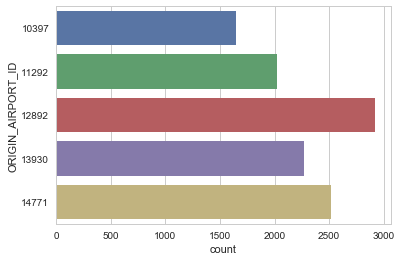

In [70]:
sns.countplot(y="ORIGIN_AIRPORT_ID", data=clean_data)
plt.show()